# Practica ML


# Importació de les llibreries
Per a importar i poder fer referència a les distintes funcions de les llibreries hem d'executar les següents comandes:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pip
pip.main(['install','seaborn'])
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# Anàlisi de dades


#### Carregues Datasets


Carregam el dataset de vi tint a un dataframe a partir del fitxer csv: "winequality-red.csv" i cream un valor fixe del tipus vi, en aquest cas, "tinto".

In [2]:
tinto = pd.read_csv('winequality-red.csv', sep = ';')
tinto["type"] = "tinto" 
tinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,tinto
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,tinto
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,tinto
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto


Feim el mateix amb el dataset del vi blanc, amb el fitxer csv: "winequality-white.csv" i cream un valor fixe del tipus vi, en aquest cas, "blanc".

In [3]:
blanc = pd.read_csv('winequality-white.csv', sep = ';')
blanc["type"] = "blanc" 
blanc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,blanc
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,blanc
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,blanc
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc


# Preparació de les dades

En aquest apartat juntarem els dos datasets en un i transformarem tots els valors a númerics per a que aixi es pugui fer una comparació entre ells.


Juntam els dos datasets 'blanc' i 'tinto' dins vins

In [4]:
vins = pd.concat([blanc, tinto])
vinsaux = pd.concat([blanc, tinto])
vins.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,blanc
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,blanc
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,blanc
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,blanc



Mostram la quantiat de vins que hi ha de cada tipus

In [5]:
vins.groupby('type').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
blanc,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898,4898
tinto,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599,1599



Transformam la columna type en valors numerics, on blanc=0 i tint=1

In [6]:
label_quality=LabelEncoder()
vins["type"]=label_quality.fit_transform(vins["type"])
vinsaux["type"]=label_quality.fit_transform(vinsaux["type"])


Visualitzam la taula de vins, on ara podem veure que el valor type surt cambiat als valors númerics assignats abans

In [7]:
vins.head

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  



Gràfic que mostra la quantitat de vins de cada qualitat

<AxesSubplot:xlabel='quality', ylabel='count'>

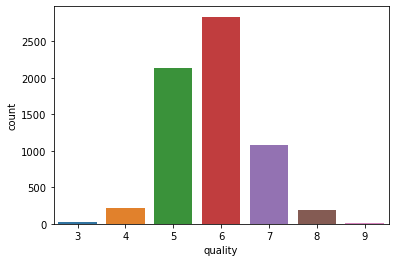

In [8]:
sns.countplot(x='quality', data=vins)

#### Taula de correlacions

Taula que mostra les correlacions entre cada característica del vi.
Quan més allunyat de 0 es el valor, mes relació amb el posible valor d'una característica te. 
Si es negatiu el valor vol dir que la seva relació es inversa (quan un puja l'altre baixa) i sino es que es directa.

<AxesSubplot:>

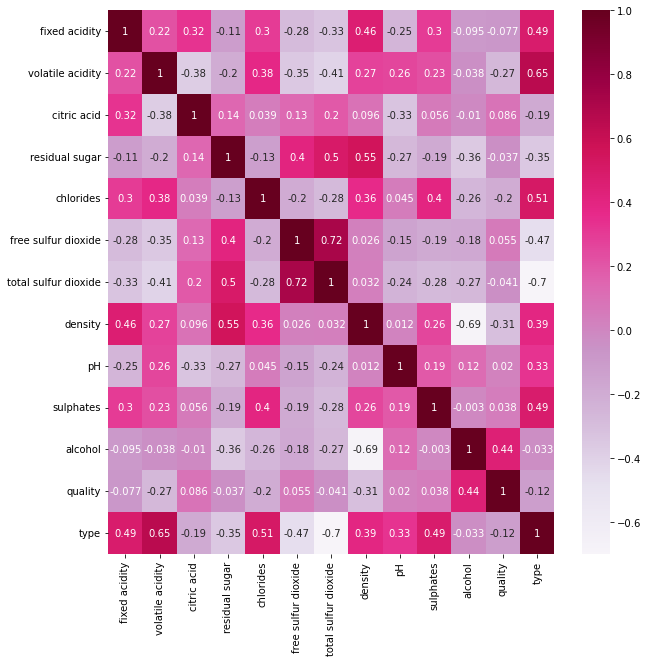

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(vins.corr(),cmap= 'PuRd',annot=True)

#### Divisió train/test

Asignam a 'y' la columna de "quality" y a 'x' les altres

In [10]:
y = vinsaux["quality"]
vinsaux.drop("quality", axis=1, inplace=True)
X = vinsaux.values 

Escalam les dades de X

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)


Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
L'altre 33% serà el que intentarem prediu-re amb l'algorisme

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

# Classificació «9 qualitats»

## Regresió Logística

In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat,zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.01      0.03        71
           5       0.60      0.63      0.62       707
           6       0.53      0.73      0.61       939
           7       0.50      0.13      0.20       364
           8       0.00      0.00      0.00        57

    accuracy                           0.55      2145
   macro avg       0.44      0.25      0.24      2145
weighted avg       0.55      0.55      0.51      2145



#### Anàlisi Resultats

Per començar podem veure que els valors que tenen menys mostres no presenten prediccions i per tant el seu recall es 0, això es degut a que l'algorisme te menys "training" amb aquests resultats i es més dificil acertar ja que els confon amb altres valors
En el cas de qualitat 4 veum que te una presició de 1 pero un recall quasi null, aixo vol dir que haura predit un o dos quatres i els dos ho eren, pero com que n'hi ha 71, vol dir que uns 69 o 70 no han estat predits correctament.
També podem veure que a mesura que aumenta el nombre de mostres, el recall aumenta, això es degut a que com que te mes exemples, tendeix a predir mes els valors que ha vist mes, d'aqui l'alt recall. La precisió es mes baixa degut al mateix motiu, i es que predeix vins en aquelles qualitats que no hu son.

## Perceptró

In [14]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        71
           5       0.47      0.90      0.62       707
           6       0.49      0.40      0.44       939
           7       0.00      0.00      0.00       364
           8       0.00      0.00      0.00        57

    accuracy                           0.47      2145
   macro avg       0.16      0.22      0.18      2145
weighted avg       0.37      0.47      0.40      2145



C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Anàlisi Resultats

En el cas del perceptró podem veure que només prediu els dos valors amb més mostres, es por això que el seu recall es 
més elevat que en el cas anterior, el problema que te es que el seu % de predicció es més baix.
Comparat amb el Logistic Regression podem dir que no ho millora ya que els seus weighted avg son menors en ambdós casos

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.62      0.07      0.13        71
           5       0.68      0.72      0.70       707
           6       0.64      0.76      0.69       939
           7       0.68      0.48      0.56       364
           8       0.89      0.30      0.45        57

    accuracy                           0.66      2145
   macro avg       0.59      0.39      0.42      2145
weighted avg       0.66      0.66      0.64      2145



C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Anàlisi Resultats

En este cas podem veure que els valors de precisió son parescuts en totes les dades amb una mostra significativa,
a més aquests son més elevats que amb els altres dos algorismes i venen acompanyats d'un alt recall, d'alla que el seu weighted avg sigui més alt. Aquest algorisme te un exit molt més alt a les mostres mes petites i aixo fa que les prediccions de totes les qualitats en general sigui més alta.

# Classificació «3 qualitats»

#### Preparació dades

Primer preparam les dades per que estiguin dividides en 3 qualitats
Classificam la qualitat dels vins en bo(>=7), mitjà(6) i dolent(<=5)

In [16]:
bins = (2.5,5.5,6.5,9.5)
group_names = ['dolent','mitja','bo']
vins["quality"] = pd.cut(vins["quality"], bins = bins, labels = group_names)
print(vins)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

#### Divisió train/test

Asignam a 'y' la columna de "quality" y a 'x' les altres

In [17]:
y = vins["quality"]
X = vinsaux.values 

Escalam les dades de X

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
L'altre 33% serà el que intentarem prediur-re amb l'algorisme

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Regresió Logística

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))
#Con las calidades divididas en 3, las muestras de cada valor son mayores y por tanto podemos afirmar que las 
#predicciones seran mas altas que en al caso anterior, algo que confirma la tabla.
#Podemos ver que en el caso de vinos buenos, pese a que la muestra es alta, no obtiene un recall alto y esto es debido a
#que el número de muestras de los otros dos es mucho mayor que el de bueno y por tanto el algoritmos tiende a clasificar
#estos vinos en otra de las dos categorias

              precision    recall  f1-score   support

          bo       0.59      0.26      0.36       421
      dolent       0.65      0.67      0.66       785
       mitja       0.53      0.66      0.59       939

    accuracy                           0.58      2145
   macro avg       0.59      0.53      0.54      2145
weighted avg       0.59      0.58      0.57      2145



#### Anàlisi Resultats

Amb les qualitats dividides en 3, les mostres de cada valor son majors i per tant les prediccions son més acertades com podem veure.
Encara així podem veure que en el cas de vins bons, al tenir un número de mostres considerablement inferior als altres dos, sofreix un poc en la predicció i tendeix a estar classificat a una de les altres qualitats per l'algorisme

## Perceptró

In [21]:
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))


              precision    recall  f1-score   support

          bo       0.45      0.31      0.37       421
      dolent       0.67      0.60      0.63       785
       mitja       0.51      0.63      0.57       939

    accuracy                           0.56      2145
   macro avg       0.54      0.51      0.52      2145
weighted avg       0.56      0.56      0.55      2145



#### Anàlisi Resultats

Amb el canvi de qualitats, podem veure que el perceptró se iguala un poc més a la regresió logística, i per tant ha estat mes beneficiat per el canvi.

## Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))
#El Random Forest sigue teniendo unos resultados bastante buenos pero es el que mejora menos respecto al cambio.

              precision    recall  f1-score   support

          bo       0.75      0.56      0.64       421
      dolent       0.73      0.75      0.74       785
       mitja       0.65      0.71      0.68       939

    accuracy                           0.70      2145
   macro avg       0.71      0.67      0.69      2145
weighted avg       0.70      0.70      0.70      2145



#### Anàlisi Resultats

El Random Forest segueix tenguent els millors resultats, però es el que menys millora amb el canvi, això es degut a que el canvi fa que les mostres de cada un aumentin, i el que feia destacar més a l'algorisme era el fet de que acertaba molt en les mostres de menys tamany.

# Conclusions

Podem concluir llavors que a mesura que aumenta el nombre de mostres, les prediccions son més precises, i que quan mes proporcionals siguin el nombre de mostres entre cada conjunt, millor.
També podem dir que l'algorisme de Random Forest es el que presenta uns millor resultats degut a la seva capacitat per tenir en compte mostres més petites, i que degut a aquesta ventatja es també el que menys es favoreix d'una reducció a 3 qualitats, encara que també millora

# Apartat B

In [23]:
#Tornam a donar-li les dades originals a vi per poder fer els tests amb els requeriments de B
vins = pd.concat([blanc, tinto])

<AxesSubplot:>

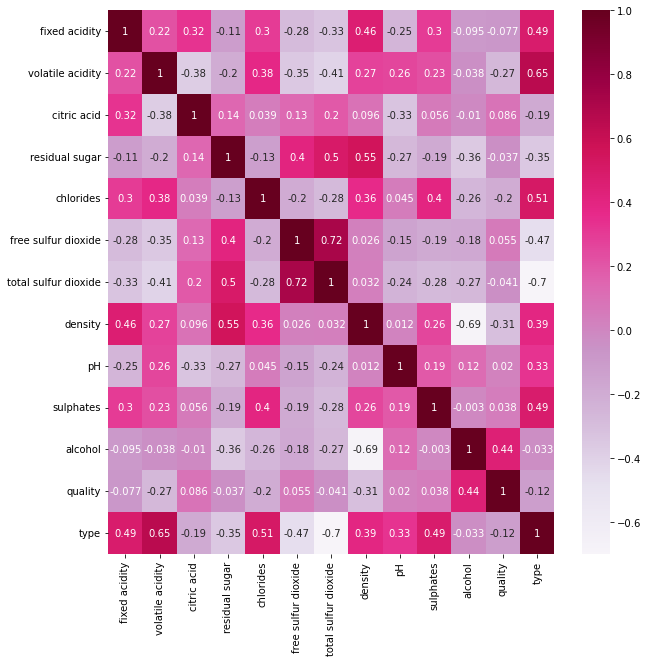

In [24]:
#Transformam la columna type en valors numerics, on blanc=0 i tint=1
label_quality=LabelEncoder()
vins["type"]=label_quality.fit_transform(vins["type"])

#Tabla que mostra les correlacions entre cada característica del vi
plt.figure(figsize=(10,10))
sns.heatmap(vins.corr(),cmap= 'PuRd',annot=True)

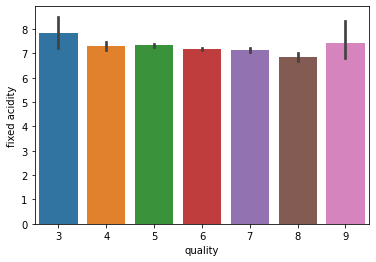

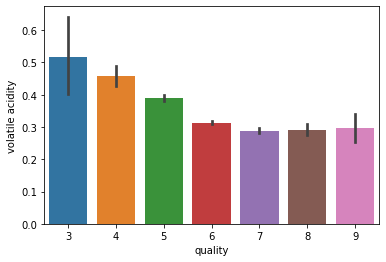

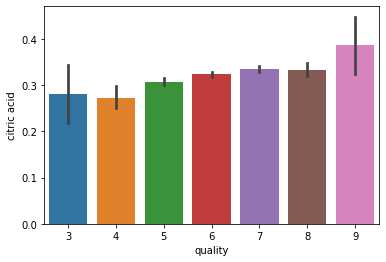

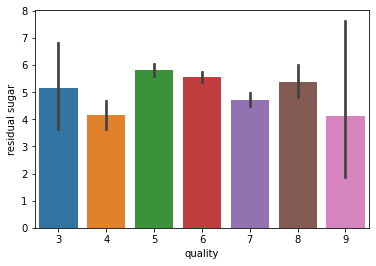

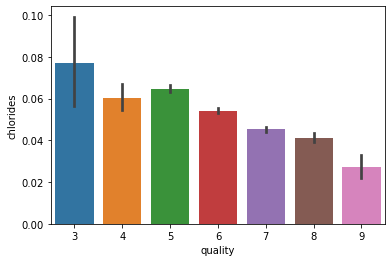

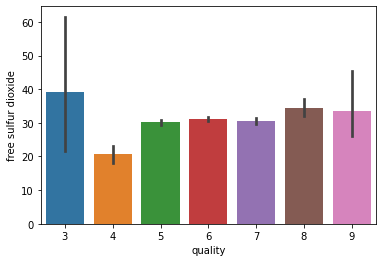

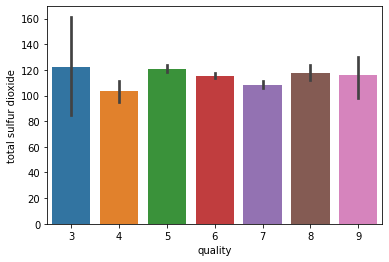

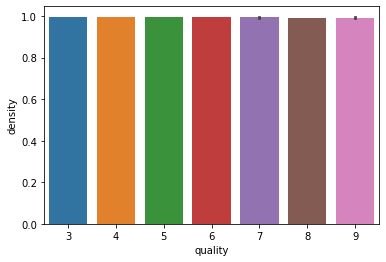

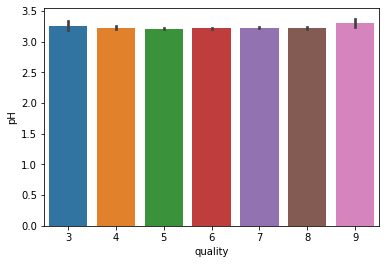

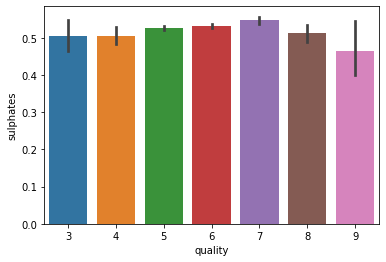

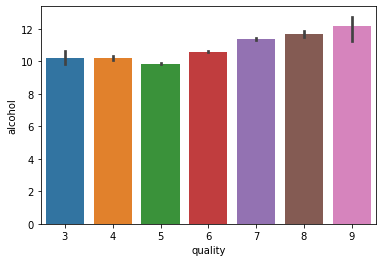

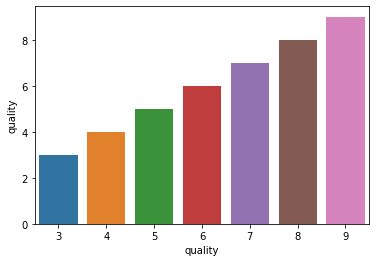

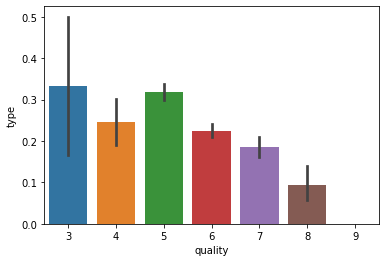

In [25]:
#Mostram una taula de la correlació que te cada columna amb el valor resultant de "quality" perque sigui més visual
vinsaux=vins.select_dtypes([int,float])
for i, col in enumerate(vins.columns):
    plt.figure(i)
    sns.barplot(x="quality",y=col,data=vinsaux)

In [26]:
#Llevam les columnes que tenen una correlació entre (-0.1,0.1) amb la "quality" ja que la seva relació amb els valors 
#de la qualitat es molt baixa i per tant son dades que molesten als algorismes a l'hora de prediure ja que adquireixen
#més importancia de la que mereixen
column_1 = vins["quality"]
for i, col in enumerate(vins.columns):
    column_2 = vins[col]
    corre = column_1.corr(column_2)  
    if corre < 0.1:
        if corre > -0.1:
            vins.drop(col, axis=1, inplace=True)
    
                      

<AxesSubplot:>

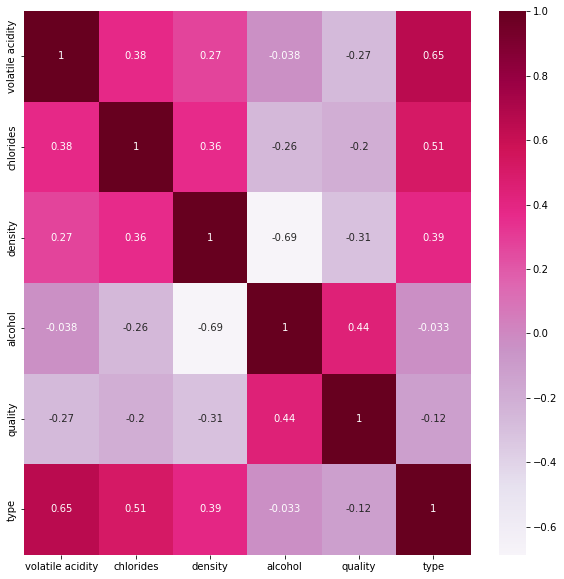

In [27]:
#Mostram el mapa de correlacions amb les columnes menys rellevants ja llevades
plt.figure(figsize=(10,10))
sns.heatmap(vins.corr(),cmap= 'PuRd',annot=True)

In [28]:
#Asignam a 'y' la columna de "quality" y a 'x' les altres
y = vins["quality"]
X = vinsaux.values 

In [29]:
#Escalam les dades de X
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [30]:
#Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
#L'altre 33% serà el que intentarem prediur-re amb l'algorisme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [31]:
#Regresió Logística
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))
#Podemos ver que el hecho de haber quitado las columnas con menos correlación ha ayudado bastante en las predicciones.
#Esto es debido a que el algoritmo daba la misma importancia a todas las columnas, y las que hemos quitado no ayudaban
# a la predicción de la calidad, por tanto ahora el algoritmo no da importancia a los datos que no tenian relevancia
#Vemos que los datos con muestras pequeñas no varian ya que sigue siendo dificil sacar conclusiones con tan pocos 
#ejemplos, pero los valores con mas datos son mucho más precisos.

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.03      0.05        71
           5       0.90      1.00      0.95       707
           6       0.97      1.00      0.98       939
           7       0.85      0.92      0.89       364
           8       0.00      0.00      0.00        57

    accuracy                           0.92      2145
   macro avg       0.62      0.49      0.48      2145
weighted avg       0.90      0.92      0.90      2145



C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#Perceptró
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))
#Con el perceptrón pasa lo mismo, pero tiene una precisión más baja que la regresión logística

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.67      0.06      0.10        71
           5       0.86      0.97      0.91       707
           6       0.75      0.96      0.85       939
           7       0.61      0.25      0.35       364
           8       0.00      0.00      0.00        57

    accuracy                           0.78      2145
   macro avg       0.48      0.37      0.37      2145
weighted avg       0.74      0.78      0.73      2145



C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))
#El Random Forest, es el que obtiene una mejora más notoria puesto que obtiene una precisión de casi el 100%, solo 
#fallando en la predicción de algunos 3 como 4 y algún 8 como 7

              precision    recall  f1-score   support

           3       1.00      0.29      0.44         7
           4       0.93      1.00      0.97        71
           5       1.00      1.00      1.00       707
           6       1.00      1.00      1.00       939
           7       1.00      1.00      1.00       364
           8       1.00      0.98      0.99        57

    accuracy                           1.00      2145
   macro avg       0.99      0.88      0.90      2145
weighted avg       1.00      1.00      1.00      2145



In [34]:
#Classificam la qualitat dels vins en bo(>=7), mitjà(6) i dolent(<=5)
bins = (2.5,5.5,6.5,9.5)
group_names = ['dolent','mitja','bo']
vins["quality"] = pd.cut(vins["quality"], bins = bins, labels = group_names)

In [35]:
#Asignam a 'y' la columna de "quality" y a 'x' les altres
y = vins["quality"]
X = vinsaux.values 

In [36]:
#Escalam les dades de X
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
#Ficam el 67% de los valors a Xtrain/Ytrain que seran els que utilitzarem per "entrenar" l'algorisme
#L'altre 33% serà el que intentarem prediur-re amb l'algorisme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [37]:
#Regresió Logística
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, y_train)
y_hat = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))
#Vemos que dividiendo los cualidades en buena, media y mala, la precisión es del 100% puesto que ahora tiene más muestras
#de cada tipo y además ya no tiene las columnas menos relevantes

              precision    recall  f1-score   support

          bo       1.00      1.00      1.00       421
      dolent       1.00      1.00      1.00       785
       mitja       1.00      1.00      1.00       939

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145



In [38]:
#Perceptró
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))
#El perceptrón mejora con la division de calidades pero no logra la perfección como el algoritmo anterior

              precision    recall  f1-score   support

          bo       0.89      1.00      0.94       421
      dolent       0.75      1.00      0.86       785
       mitja       1.00      0.67      0.80       939

    accuracy                           0.86      2145
   macro avg       0.88      0.89      0.87      2145
weighted avg       0.89      0.86      0.85      2145



In [39]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(classification_report(y_test, y_hat))
#El Random Forest consigue tener un 100% de precisión debido a que sus fallos cuando no se habian dividido las calidades
#eran en la cofusión de 3 con 4 y 7 con 8 y ahora estos estan agrupados en el mismo grupo, dolent y bo respectivamente.

              precision    recall  f1-score   support

          bo       1.00      1.00      1.00       421
      dolent       1.00      1.00      1.00       785
       mitja       1.00      1.00      1.00       939

    accuracy                           1.00      2145
   macro avg       1.00      1.00      1.00      2145
weighted avg       1.00      1.00      1.00      2145

